# ML_Simple_Linear_Regression_And_Multiple_Linear_Regression

## 1. ExploreAI

## What is simple linear regression

Simple linear regression is a statistical method that allows us to understand and predict the relationship between **two continuous** variables. One variable, denoted as `y`, is considered the dependent variable, and the other, denoted as `x`, is considered the independent variable. The goal of simple linear regression is to model the linear relationship between these two variables through a linear equation of the form: 

```y = mx + c```

In this equation:
- `y` is the dependent variable we aim to predict or understand.
- `x` is the independent variable used for prediction.
- `m` is the slope of the line, representing how much `y` changes for a one-unit change in `x`.
- `c` is the y-intercept, indicating the value of `y` when `x` is `0`.

## Why we use it
Simple linear regression is widely used for several key reasons:
- **Prediction:** It enables the prediction of the dependent variable's value based on the independent variable. For instance, predicting the yield of a crop based on the altitude it is grown at.
- **Inference:** It provides insights into the relationship between the two variables, including the direction and strength of this relationship. It helps in understanding how significant the independent variable is in explaining variations in the dependent variable.
- **Simplicity:** Its straightforwardness makes it an accessible tool for modeling linear relationships, offering a clear starting point for regression analysis before considering more complex models.

## When we use it
Simple linear regression is applicable under certain conditions:
- **Linear relationship:** The method assumes a linear relationship between the independent and dependent variables. Preliminary scatter plot analysis can help verify this assumption.
- **Homoscedasticity:** The variability (or spread) of the dependent variable should be consistent across all values of the independent variable.
- **Independence:** Each observation's residuals should be independent, ensuring no correlation between them for reliable statistical inference.
- **Normality:** For purposes of statistical inference, the residuals of the model should ideally follow a normal distribution.

## 1.1. Implementing simple linear regression in Python(From Scratch)

 We can use libraries such as NumPy, pandas, and scikit-learn to model the relationships between variables in Python. This allows us to uncover insights and predict outcomes using the model.

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from matplotlib import rc # to do what?

In [2]:
df1 = pd.read_csv('data/exports%20ZAR-USD-data.csv')
df1.head()

,Unnamed: 0,ZAR/USD,Value of Exports (ZAR)
0,2008M01,7.01,39356.82
1,2008M02,7.66,46946.33
2,2008M03,7.97,51150.89
3,2008M04,7.79,56174.34
4,2008M05,7.62,56240.45


In [3]:
df1 = pd.read_csv('data/exports%20ZAR-USD-data.csv', index_col = 0)
df1.head()

,ZAR/USD,Value of Exports (ZAR)
2008M01,7.01,39356.82
2008M02,7.66,46946.33
2008M03,7.97,51150.89
2008M04,7.79,56174.34
2008M05,7.62,56240.45


So it looks like we have some monthly data for **both the Rand:Dollar exchange rate**, and **the value of South African exports**.   

In this case, we will choose the Rand/Dollar exchange rate as our **dependent variable** and **the monthly value of exports (in Rands) as our independent variable** - i.e. we are going to use exports as a predictor for currency value.

For ease of future reference, let's change our column names to reflect the notation which we'll be following going forward:

In [4]:
# Rename the columns of the dataframe to 'Y' and 'X'
df1.columns = ['y','X']
df1.head()

,y,X
2008M01,7.01,39356.82
2008M02,7.66,46946.33
2008M03,7.97,51150.89
2008M04,7.79,56174.34
2008M05,7.62,56240.45


### **Let's create a few plots of the data** using the matplotlib libarary.

 Let's create a plot to visualise the exchange rate of the South African Rand (ZAR) against the US Dollar (USD) over time. This provides insights into currency value fluctuations across the observed months.

In [5]:
type(df1.y)

pandas.core.series.Series

In [6]:
df1.y

2008M01     7.01
2008M02     7.66
2008M03     7.97
2008M04     7.79
2008M05     7.62
           ...  
2017M08    13.23
2017M09    13.16
2017M10    13.71
2017M11    14.06
2017M12    13.25
Name: y, Length: 120, dtype: float64

In [7]:
len(df1.y)

120

In [8]:
np.arange(len(df1.y))

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119])

In [9]:
np.arange(9.5)

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

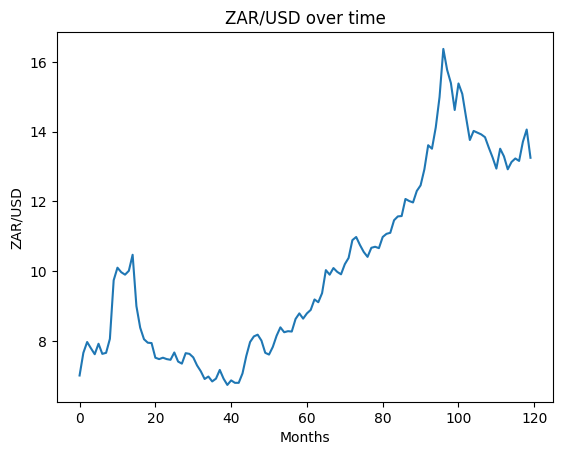

In [10]:
# plt.plot()
# Plotting the ZAR/USD exchange rate over time
plt.plot(np.arange(len(df1.y)), df1.y) # Create a line plot for the ZAR/USD values
plt.title("ZAR/USD over time") # Title of the plot
plt.xlabel("Months") # Label for the x-axis 
plt.ylabel("ZAR/USD") # Label for the y-axis
plt.show() # Display the plot

 Let's create a plot to visualise the value of exports from South Africa, measured in millions of ZAR. This helps show us any trends in export activity and economic performance over the same period.

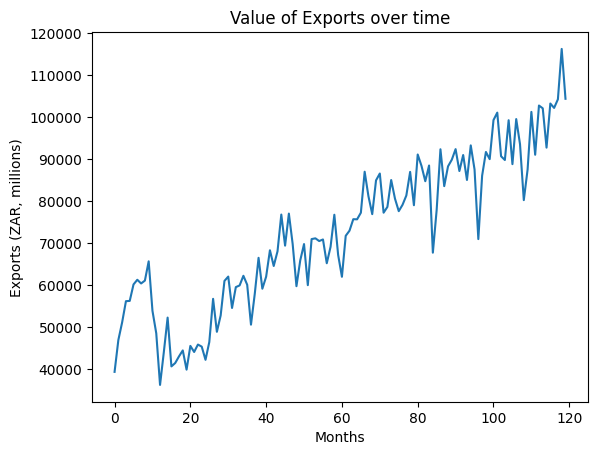

In [11]:
plt.plot(np.arange(len(df1.X)), df1.X)
plt.title("Value of Exports over time")
plt.xlabel("Months")
plt.ylabel("Exports (ZAR, millions)")
plt.show()

## Example 2
Let's try and create something a little more visually appealing than the two plots above.

- We'll plot both dependent data series on the same graph
- We'll assign two separate y-axes: one for each series
- We'll display a legend near the top of the plot

In [12]:
rc('mathtext', default='regular') # Set the default style for math text in plots to regular text
fig = plt.figure() # Create a blank figure object to hold the plots

<Figure size 640x480 with 0 Axes>

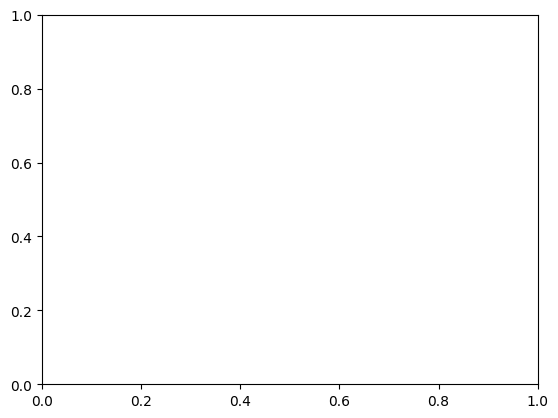

In [13]:
rc('mathtext', default='regular') # Set the default style for math text in plots to regular text
fig = plt.figure() # Create a blank figure object to hold the plots
# Add a subplot to the figure, '111' means 1x1 grid, first subplot
ax = fig.add_subplot(111) 

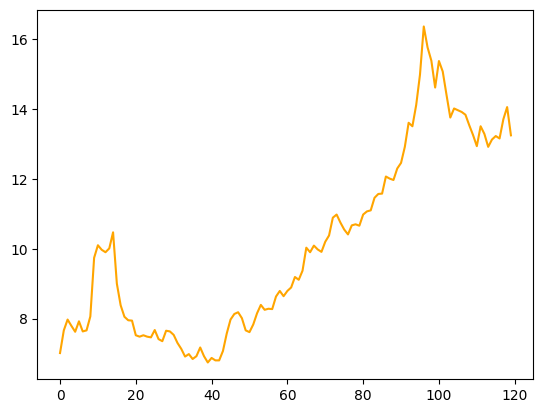

In [14]:

rc('mathtext', default='regular') # Set the default style for math text in plots to regular text
fig = plt.figure() # Create a blank figure object to hold the plots
# Add a subplot to the figure, '111' means 1x1 grid, first subplot
ax = fig.add_subplot(111) 
# Plot the ZAR/USD exchange rate data on the primary y-axis using an orange line
ax.plot(np.arange(len(df1.y)), df1.y, '-', label = 'ZAR/USD', color='orange') 

# # Create a second y-axis (twin of the first) to accommodate another data set on the same x-axis
# ax2 = ax.twinx() 

# # Plot the Value of Exports data on the secondary y-axis
# ax2.plot(np.arange(len(df.X)), df.X, '-', label = 'Exports (ZAR)')

# # Add legends to distinguish the two lines, with custom locations for clarity
# ax.legend(loc=2)  # Legend for the primary axis (ZAR/USD) at the top left (location 2)
# ax2.legend(loc=9)  # Legend for the secondary axis (Exports) at the top center (location 9)

# ax.grid() # Enable grid for better readability of the plot

# # Set the labels for the x-axis and both y-axes to indicate the data being plotted
# ax.set_xlabel("Months")
# ax.set_ylabel("ZAR/USD")
# ax2.set_ylabel("Exports (ZAR, millions)")

# plt.show() # Display the plot

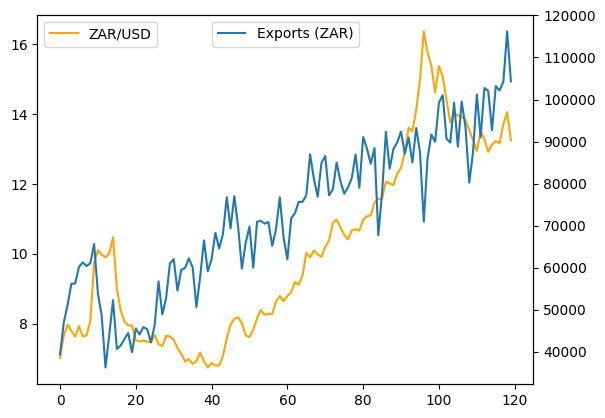

In [15]:
rc('mathtext', default='regular') # Set the default style for math text in plots to regular text
fig = plt.figure() # Create a blank figure object to hold the plots
# Add a subplot to the figure, '111' means 1x1 grid, first subplot
ax = fig.add_subplot(111) 
# Plot the ZAR/USD exchange rate data on the primary y-axis using an orange line
ax.plot(np.arange(len(df1.y)), df1.y, '-', label = 'ZAR/USD', color='orange') 

# Create a second y-axis (twin of the first) to accommodate another data set on the same x-axis
ax2 = ax.twinx() 

# Plot the Value of Exports data on the secondary y-axis
ax2.plot(np.arange(len(df1.X)), df1.X, '-', label = 'Exports (ZAR)')

# Add legends to distinguish the two lines, with custom locations for clarity
ax.legend(loc=2)  # Legend for the primary axis (ZAR/USD) at the top left (location 2)
ax2.legend(loc=9)  # Legend for the secondary axis (Exports) at the top center (location 9)

# ax.grid() # Enable grid for better readability of the plot

# # Set the labels for the x-axis and both y-axes to indicate the data being plotted
# ax.set_xlabel("Months")
# ax.set_ylabel("ZAR/USD")
# ax2.set_ylabel("Exports (ZAR, millions)")

# plt.show() # Display the plot

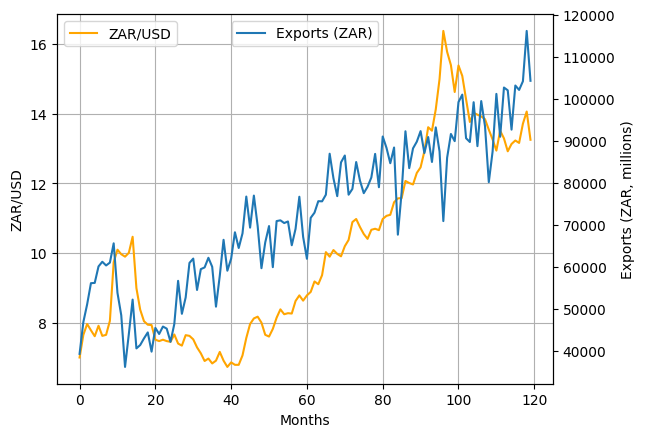

In [16]:
rc('mathtext', default='regular') # Set the default style for math text in plots to regular text
fig = plt.figure() # Create a blank figure object to hold the plots
# Add a subplot to the figure, '111' means 1x1 grid, first subplot
ax = fig.add_subplot(111) 
# Plot the ZAR/USD exchange rate data on the primary y-axis using an orange line
ax.plot(np.arange(len(df1.y)), df1.y, '-', label = 'ZAR/USD', color='orange') 

# Create a second y-axis (twin of the first) to accommodate another data set on the same x-axis
ax2 = ax.twinx() 

# Plot the Value of Exports data on the secondary y-axis
ax2.plot(np.arange(len(df1.X)), df1.X, '-', label = 'Exports (ZAR)')
# ax2.plot(np.arange(len(df1.X)), df1.X, '-', label = 'Exports (ZAR)', color='red')

# Add legends to distinguish the two lines, with custom locations for clarity
ax.legend(loc=2)  # Legend for the primary axis (ZAR/USD) at the top left (location 2)
ax2.legend(loc=9)  # Legend for the secondary axis (Exports) at the top center (location 9)

ax.grid() # Enable grid for better readability of the plot

# Set the labels for the x-axis and both y-axes to indicate the data being plotted
ax.set_xlabel("Months")
ax.set_ylabel("ZAR/USD")
ax2.set_ylabel("Exports (ZAR, millions)")

plt.show() # Display the plot

# Let's get started with regression
So the plots above - although they are easy to interpret - show too many variables. We have our Y, our X, and time (months), but we're just trying to model ZAR/USD as a *function* of Exports.   

**Note:** It's important to note here that we are **not** trying to model the exchange rate as a function of time.
   
### Example 3
Let's try and show the relationship between the two variables using a scatter plot.

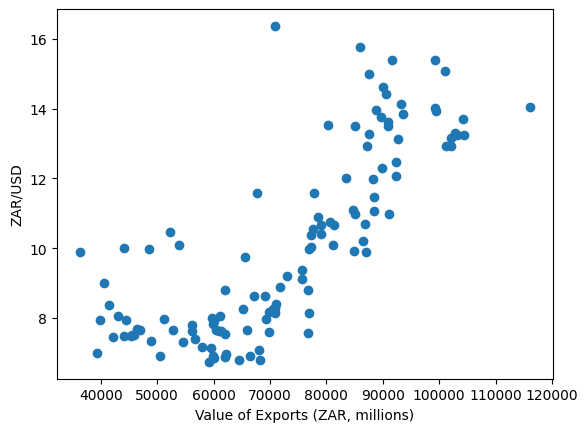

In [17]:
# Plot the original dataset with 'X' as Value of Exports and 'Y' as ZAR/USD exchange rate using a scatter plot
plt.scatter(df1['X'], df1['y'])
plt.ylabel("ZAR/USD")
plt.xlabel("Value of Exports (ZAR, millions)")
plt.show()

From the plot above, we can see that there possibly exists a linear relationship between the two variables: **Value of Exports** and **ZAR/USD**, due to the linear trend of the data.

We would like to be able to fit a line to this data such that we can make predictions of Y for new values of X. We would like to calculate values for the slope, $m$ and the y-intercept, $c$ such that the line represented by $y = mx + c$ lies as close as possible to the points shown in the scatter plot above.

## Finding the best fit line
Let's say we have estimated some values for $m$ and $c$. We could plug in all of our values of X to find the corresponding values of Y. These *new* values of Y could be compared to the *actual* values of Y to assess the fit of the line. This becomes tedious as the number of data points increases.

### Example 4
   
Looking at the data, we can guess the values of the slope and intercept of the line. We'll use a rough estimate of the slope as $\frac{rise}{run} = \frac{16}{80000} = 0.0002$. For the intercept, we'll just take a guess and call it $-3$.   
   
Let's plot a line with values of $m = 0.0002$ and $c = -3$.
   
First, we will need to generate some values of y using the following formula:
   
$$\hat{y}_i = mx_i + c$$   

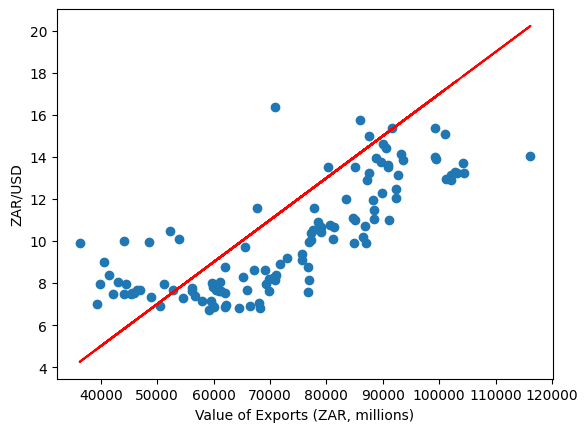

In [18]:
# Define a function to generate predicted values of 'Y' (ZAR/USD) for a given list of 'X' (Value of Exports),
# based on linear equation parameters 'm' (slope) and 'c' (intercept)

def gen_y(x_list, m, c):
    y_gen = []
    for x_i in x_list:  # Loop through each value in the list of 'X'
        y_i = m*x_i + c # Calculate the corresponding 'Y' value using the linear equation
        y_gen.append(y_i) # Append the calculated 'Y' value to the list
    
    return(y_gen) # Return the list of generated 'Y' values

# Generate the predicted 'Y' values using the 'gen_y' function with specified 'm' and 'c' parameters
y_gen = gen_y(df1.X, 0.0002, -3)

# Plot the original data and the linear regression line
plt.scatter(df1['X'], df1['y']) # Plot the original data as a scatter plot
plt.plot(df1['X'], y_gen, color='red') # Plot the generated 'Y' values as a line in red to represent the linear model
plt.ylabel("ZAR/USD")
plt.xlabel("Value of Exports (ZAR, millions)")
plt.show()

At first glance, it looks like the fit of this line is not too bad!   

### Example 5
   
**Let's check the calculated fit of the line** by measuring how far the true y-values of each point are from their corresponding y-value on the line.   
   
We'll use the equation below to calculate the error of each generated value of y:   
   
$$e_i = y_i - \hat{y}_i$$   

In [19]:
errors = np.array(df1.y - y_gen)
np.round(errors, 2)

array([ 2.14,  1.27,  0.74, -0.44, -0.63, -1.11, -1.62, -1.42, -1.15,
       -0.39,  2.32,  3.26,  5.65,  4.2 ,  3.02,  3.87,  3.09,  2.44,
        2.06,  2.96,  1.41,  1.66,  1.35,  1.41,  2.02,  1.38, -0.94,
        0.57,  0.09, -1.57, -1.88, -0.61, -1.77, -2.07, -2.46, -2.18,
       -0.2 , -1.42, -3.38, -2.09, -2.53, -3.86, -3.11, -3.54, -4.79,
       -2.91, -4.27, -2.78, -0.94, -2.52, -3.34, -1.17, -3.04, -2.84,
       -2.85, -2.89, -1.77, -2.19, -3.56, -1.8 , -0.61, -2.46, -2.4 ,
       -3.03, -2.76, -2.41, -4.49, -3.14, -2.4 , -4.07, -4.11, -2.06,
       -1.83, -3.02, -2.36, -1.97, -2.41, -2.59, -3.69, -2.14, -4.23,
       -3.6 , -2.84, -3.23,  1.03, -0.99, -3.39, -1.7 , -2.68, -2.67,
       -3.01, -1.51, -1.58, -0.49, -1.53,  0.49,  5.18,  1.57,  0.06,
       -0.37, -1.47, -2.13, -0.72, -1.19, -2.83, -0.78, -2.98, -1.86,
        0.5 , -1.24, -4.3 , -1.69, -4.25, -4.49, -2.41, -4.41, -4.27,
       -4.13, -6.18, -4.61])

When looking at the errors, we see that some of our predictions are off by almost R6!

Let's take a look at a distribution of our errors (using a histogram).

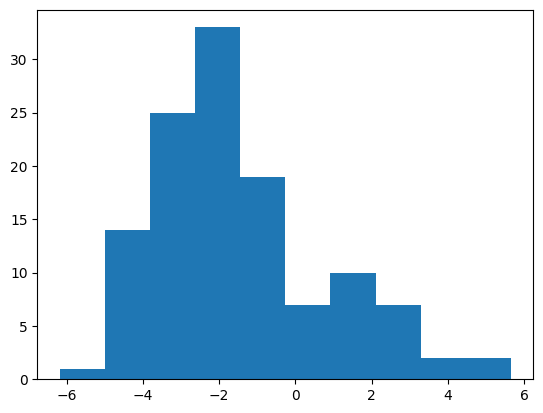

In [20]:
plt.hist(errors)
plt.show()

In addition to having some very large errors, we can also see that most of the errors are negative numbers. Ideally, we want our errors to be evenly distributed either side of zero - we want our line to best fit the data, i.e. no bias.
   
We can measure the overall error of the fit by calculating the **Residual Sum of Squares**:
   
$$RSS = \sum_{i=1}^n(y_i-\hat{y}_i)^2$$

The RSS finds the difference between the y-value of each data point and our estimated line (which may be either negative or positive), squares the difference, and then adds all the differences up. In other words, it's the sum of the squares of all the errors we calculated before.

In [21]:
print("Residual sum of squares:", (errors ** 2).sum())

Residual sum of squares: 867.1710481532764


An RSS value of `867` indicates that the model's predictions are significantly deviating from the actual data points. A high RSS value suggests that the simple linear regression model does not capture the underlying pattern effectively, leading to inaccurate predictions and implying a poor fit between the model and the observed data. However, in this case, the RSS value is high because we guessed the values for `m` and `c`. Instead of doing this, we can employ mathematical techniques to find the optimal value for `m` and `c`, which can significantly enhance model accuracy and fit.

**Note:** The RSS is influenced by the scale of the data being forecasted, meaning that for forecasts involving large values, such as in billions, the RSS will also likely be a large number, reflecting the squared deviations of these large values.

# HOW DO WE INTERPRET RSS (Residual Sum of Square)

In simple linear regression, the Residual Sum of Squares (RSS) is a measure of the discrepancies between the observed data points and the values predicted by the model. A low RSS indicates that the model's predictions are close to the actual data points, suggesting that the model is performing well. However, whether an RSS is considered "low" depends on several factors:

### 1. Comparison with Total Sum of Squares (TSS):
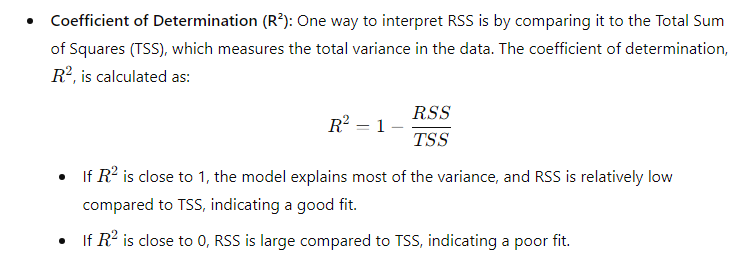

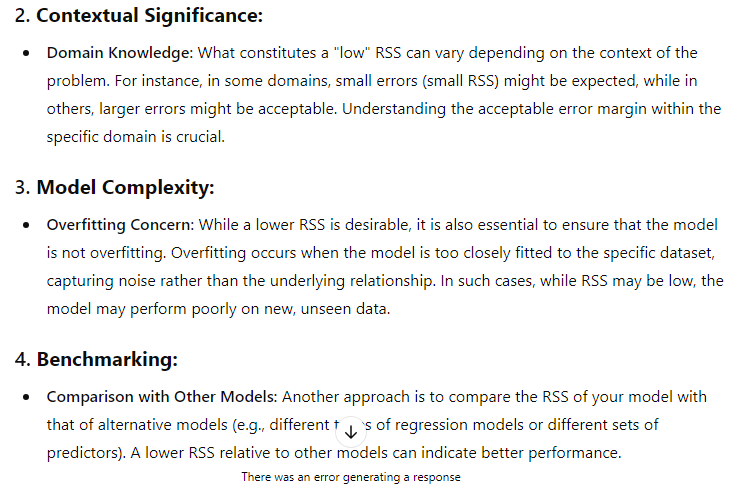


## Calculating TSS:

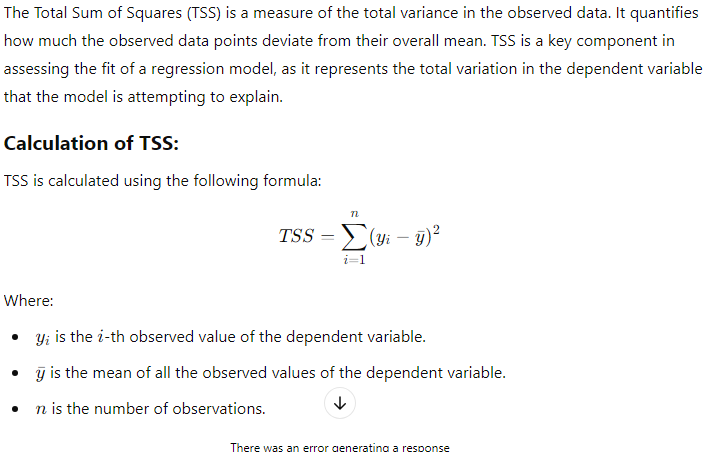
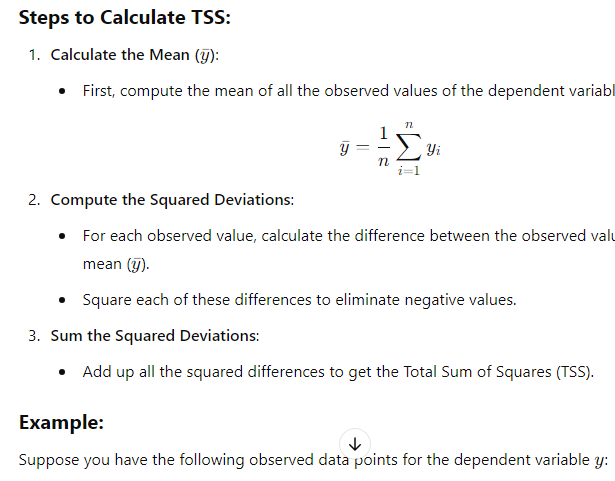
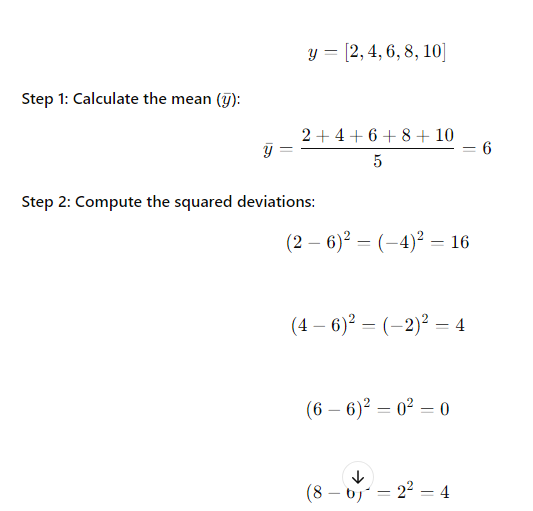
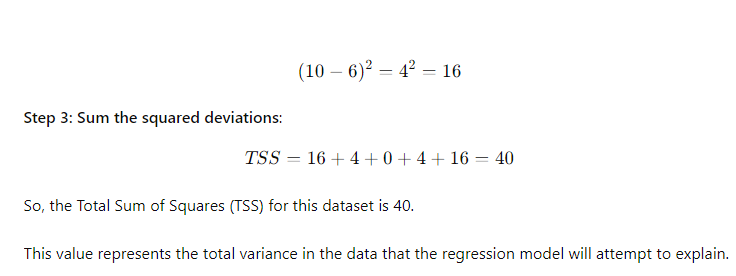

In [22]:
# Here's a Python code snippet to calculate the Total Sum of Squares (TSS) for a given set of observed values:
import numpy as np

# Example observed data points
y = np.array([2, 4, 6, 8, 10])

# Step 1: Calculate the mean of the observed data
y_mean = np.mean(y)

# Step 2: Compute the squared deviations from the mean
squared_deviations = (y - y_mean) ** 2

# Step 3: Sum the squared deviations to get TSS
TSS = np.sum(squared_deviations)

# Output the result
print(f'The Total Sum of Squares (TSS) is: {TSS}')


The Total Sum of Squares (TSS) is: 40.0


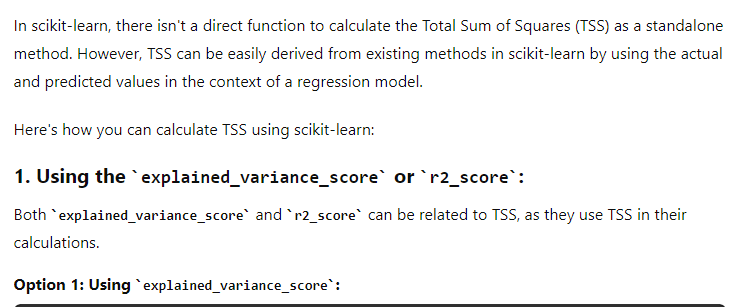

In [23]:
# Option 1: Using explained_variance_score

from sklearn.metrics import explained_variance_score
import numpy as np

# Example observed data points
y = np.array([2, 4, 6, 8, 10])

# Calculate the mean of the observed data
y_mean = np.mean(y)

# Predicted values set to the mean for TSS calculation
y_pred = np.full_like(y, y_mean)

# TSS can be inferred using the explained_variance_score with all values predicted as the mean
TSS = len(y) * explained_variance_score(y, y_pred)

# Output the result
print(f'The Total Sum of Squares (TSS) is: {TSS}')


The Total Sum of Squares (TSS) is: 0.0


In [24]:
# Option 2: Using r2_score:
# If you have the Residual Sum of Squares (RSS) and the R^2 score, you can derive TSS as follows:

from sklearn.metrics import r2_score
import numpy as np

# Example observed data points
y = np.array([2, 4, 6, 8, 10])

# Example predicted values (from a regression model)
y_pred = np.array([2.2, 3.8, 6.1, 7.9, 10.2])

# Calculate the Residual Sum of Squares (RSS)
RSS = np.sum((y - y_pred) ** 2)

# Calculate R^2 score
r2 = r2_score(y, y_pred)

# Calculate TSS using RSS and R^2
TSS = RSS / (1 - r2)

# Output the result
print(f'The Total Sum of Squares (TSS) is: {TSS}')


The Total Sum of Squares (TSS) is: 40.00000000000052


In [25]:
# 2. Manually Calculating TSS Using NumPy:

import numpy as np

# Example observed data points
y = np.array([2, 4, 6, 8, 10])

# Calculate the mean of the observed data
y_mean = np.mean(y)

# Compute the squared deviations from the mean
TSS = np.sum((y - y_mean) ** 2)

# Output the result
print(f'The Total Sum of Squares (TSS) is: {TSS}')


The Total Sum of Squares (TSS) is: 40.0


## Least squares regression

Least Squares is a method used in regression analysis to find the best-fitting straight line through a set of data points. It does this by minimising the sum of the squares of the residuals between the observed values and those predicted by the line, i.e., 
$$Q = \sum_{i=1}^n(y_i-\hat{y}_i)^2$$

The formulae for the slope, \(m\), and the intercept, \(c\), are determined by minimising the equation for the sum of the squared prediction errors:   
$$Q = \sum_{i=1}^n(y_i-(m x_i+c))^2$$

Optimal values for \(m\) and \(c\) are found by differentiating \(Q\) with respect to \(m\) and \(c\), setting both equal to 0, and then solving for \(m\) and \(c\).   
   
The equations for \(m\) and \(c\) are:   
   
$$m = \frac{\sum_{i=1}^n(x_i-\bar{x})(y_i-\bar{y})}{\sum_{i=1}^n(x_i-\bar{x})^2}$$   
   
and:   
   
$$c = \bar{y} - m \bar{x}$$

where $\bar{y}$ and $\bar{x}$ are the mean values of \(y\) and \(x\) in our dataset, respectively.

## Examples

### Example 1
   
Let's calculate these values in Python, where \(c\) is the intercept and \(m\) is the slope.


In [27]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rc

In [28]:
# Load dataset and set the first column as the index
df2 = pd.read_csv('data/exports%20ZAR-USD-data.csv', index_col=0)

# Rename columns to 'Y' for the dependent variable and 'X' for the independent variable
df2.columns = ['Y', 'X'] # Rename the columns of the dataframe to 'Y' and 'X'

In [29]:
df2.head()

,Y,X
2008M01,7.01,39356.82
2008M02,7.66,46946.33
2008M03,7.97,51150.89
2008M04,7.79,56174.34
2008M05,7.62,56240.45


In [31]:
# Extract values of X and Y as numpy arrays for mathematical operations
X = df2.X.values
Y = df2.Y.values

# Calculate mean of X and Y
x_bar = np.mean(X)
y_bar = np.mean(Y)

# Calculate the slope (m) of the regression line using the least squares method
m = sum((X - x_bar) * (Y - y_bar)) / sum((X - x_bar) ** 2)

# Calculate the intercept (c) of the regression line
c = y_bar - m * x_bar

# Output the calculated slope and intercept
print("Slope = ", m)
print("Intercept = ", c)

Slope =  0.000113507257658843
Intercept =  1.8448114670426463


## Now we'll plot the line we've just calculated the coefficients for.

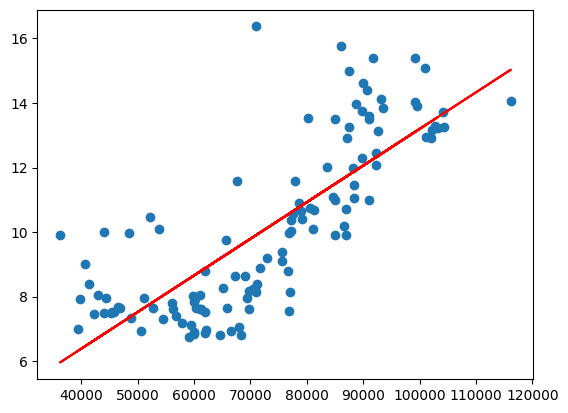

In [32]:
# use the function we created earlier to generate y-values for a given list of x-values, using the calculated slope and intercept
def gen_y(x_list, m, c):
    y_gen = []
    for x_i in x_list:  
        y_i = m*x_i + c 
        y_gen.append(y_i) 
    
    return(y_gen) 

# Generate y-values for the given x-values in the dataset based on the calculated slope and intercept
y_gen = m * df2.X + c

# Plot the original data points as a scatter plot
plt.scatter(df2.X, df2.Y)

# Plot the regression line using the generated y-values
plt.plot(df2.X, y_gen, color='red')

plt.show()

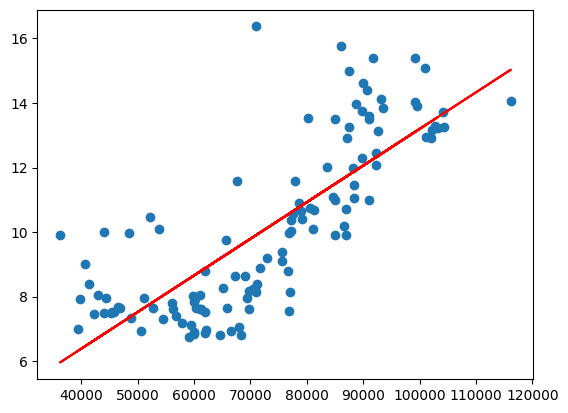

In [33]:
# use the function we created earlier to generate y-values for a given list of x-values, using the calculated slope and intercept
def gen_y(m, c):
#     y_gen = []
#     for x_i in x_list:  
#         y_i = m*x_i + c 
# #         y_gen.append(y_i)
    df2['y_gen']= df2['X'].apply(lambda i:  m*i + c)
        
    return df2['y_gen'] 

# # Generate y-values for the given x-values in the dataset based on the calculated slope and intercept
# y_gen = m * df2.X + c
    y_gen = gen_y(m, c)

# Plot the original data points as a scatter plot
plt.scatter(df2.X, df2.Y)

# Plot the regression line using the generated y-values
plt.plot(df2.X, y_gen, color='red')

plt.show()

## In a list called ```errors2```, we'll store the new error values.

In [35]:
errors2 = np.array(y_gen - df2.Y) # Calculate the residuals by subtracting the observed Y values from the generated Y values
print(np.round(errors2, 2)) # Print the residuals, rounded to 2 decimal places

[-0.7  -0.49 -0.32  0.43  0.61  0.75  1.17  1.04  0.72 -0.44 -2.14 -2.62
 -3.94 -3.16 -2.69 -2.54 -1.83 -1.32 -1.06 -1.57 -0.51 -0.63 -0.47 -0.49
 -0.82 -0.55  0.87  0.04  0.19  1.14  1.36  0.74  1.47  1.74  1.93  1.82
  0.67  1.25  2.47  1.82  2.01  2.8   2.37  2.5   2.99  1.75  2.46  1.58
  0.62  1.66  2.15  0.82  1.75  1.53  1.59  1.61  0.98  1.06  1.77  0.83
  0.09  1.1   0.93  1.32  1.06  0.58  1.82  0.96  0.59  1.57  1.47  0.23
 -0.12  0.51  0.24  0.1   0.41  0.4   1.01  0.15  1.2   0.8   0.36  0.42
 -2.04 -0.9   0.25 -0.68 -0.11 -0.26 -0.13 -1.19 -1.44 -2.02 -1.69 -3.21
 -6.47 -4.16 -3.14 -2.56 -2.27 -1.77 -2.27 -1.73 -0.91 -2.05 -0.78 -1.38
 -2.59 -1.49  0.39 -1.33  0.21  0.51 -0.76  0.33  0.28 -0.04  0.97  0.44]


## Finally, let's plot the errors on a histogram again.

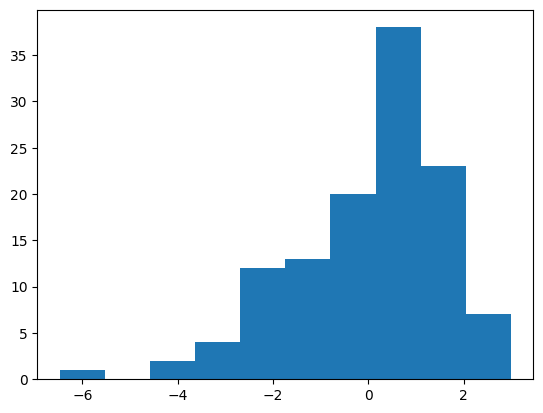

In [36]:
plt.hist(errors2)
plt.show()

In [37]:
# Calculate the Residual Sum of Squares (RSS) by squaring the residuals and summing them up
print("Residual sum of squares:", (errors2 ** 2).sum())

Residual sum of squares: 321.45716655257655


Here we can see our RSS has improved from ~867, in our previous example, down to ~321.  
Furthermore, if we calculate the sum of the errors we find that the value is close to 0.

In [38]:
# Round off the sum of residuals to 11 decimal places to check for numerical stability or precision issues
np.round(errors2.sum(),11)

-0.0

Round off the sum of residuals to 11 decimal places to check for numerical stability or precision issues

np.round(errors2.sum(),11)

## 1.2. Simple linear Regression example

## 2. WorlQuant University

## 3. Leaprlabs

## 4. S

## 5. U